In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
url = "https://www.imsdb.com/scripts/Avengers,-The-(2012).html"
resp = requests.get(url)
html = BeautifulSoup(resp.text, "html.parser")
scripts = html.find("pre")
print(str(scripts)[4000:4500])


<b>                        AGENT PHIL COULSON
</b>           Climbing. When Selvig couldn't shut it
           down, we ordered the evac.

<b>                          NICK FURY
</b>           How long to get everyone out?

<b>           AGENT PHIL COULSON
</b>           Campus should be clear in the next half
           hour.

<b>                          NICK FURY
</b>           Do better.

<b>          CONTINUOUSLY HEADING DOWN TO RADIATION FACILITY FLOOR
</b>
<b>            


In [3]:
def preprocess_scripts(scripts):
    script_list = str(scripts).split("<b>")
    script_list = [script for script in script_list if "</b>" in script]

    result = []
    for script in script_list:
        line_dict = {}
        line = script.split("</b>")

        character_name = line[0].replace("\r\n", "").replace("(V.O.)", "")
        character_name = character_name.lstrip().rstrip()
        character_name = modify_character_names(character_name)

        dialogue = [l.lstrip().rstrip() for l in line[1].split("\r\n")
                    if l.lstrip().rstrip()]
        dialogue = " ".join(dialogue)

        if dialogue and character_name:
            line_dict["character_name"] = character_name
            line_dict["dialogue"] = dialogue
            result.append(line_dict)
    df = pd.DataFrame(result)

    return df

In [4]:
def modify_character_names(character_name):
    character_info = {
        "SHIELD": ["AGENT JASPER SITWELL", "AGENT MARIA HILL",
                   "AGENT PHIL COULSON", "SHIELD AGENT", "SHIELD BASE VOICE",
                   "SHIELD SCIENTIST", "NICK FURY"],
        "CAPTAIN AMERICA": ["CAPTAIN AMERICA", "STEVE", "STEVE TONY"],
        "IRON MAN": ["IRON MAN", "TONY", "TONY STEVE"],
        "HAWKEYE": ["HAWKEYE", "BARTON", "CLINT BARTON"],
        "BLACK WIDOW": ["BLACK WIDOW", "NATASHA", "NATASHA BANNER"],
        "HULK": ["BANNER"],
        "THOR": ["THOR"],
        "LOKI": ["LOKI"],
        "JARVIS": ["JARVIS"],
        "PEPPER": ["PEPPER", "PEPPER POTTS"],
        "SELVIG": ["SELVIG"],
        "PEGGY": ["PEGGY"],
        "LUCHKOV": ["LUCHKOV"]
    }

    for k, v in character_info.items():
        if character_name in v:
            return k
    
    return None

In [5]:
df = preprocess_scripts(scripts)
df.head()

,character_name,dialogue
0,SHIELD,How bad is it?
1,SHIELD,"That's the problem, sir. We don't know."
2,SHIELD,Dr. Selvig read an energy surge from the Tesse...
3,SHIELD,NASA didn't authorize Selvig to test phase.
4,SHIELD,"He wasn't testing it, he wasn't even in the ro..."


In [6]:
def generate_word_cloud(df, character_name):
    text = ""
    df = df[df["character_name"] == character_name]
    for dialogue in df["dialogue"]:
        text = " ".join([text, dialogue])

    wc = WordCloud(width=800, height=600, max_words=50,
                   background_color="white")
    wc.generate(text)
    image = wc.to_array()
    plt.imshow(image)

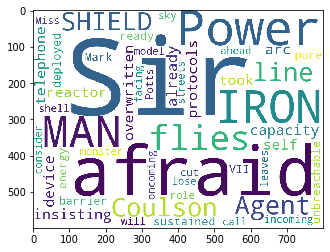

In [7]:
generate_word_cloud(df, "JARVIS")

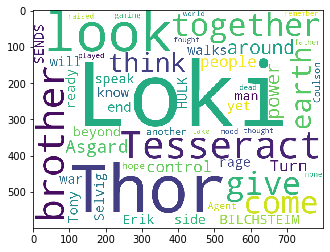

In [8]:
generate_word_cloud(df, "THOR")